Please use this notebook to perform any initial analyses and model testing!

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [157]:
df = pd.read_excel('..\data\Mine_Dataset.xls', sheet_name= 'Normalized_Data')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Corey\AppData\Local\Temp\ipykernel_10712\2502358858.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_excel('..\data\Mine_Dataset.xls', sheet_name= 'Normalized_Data')


,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [158]:
df.describe()

,V,H,S,M
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
 3   M       338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


In [160]:
df['S'].unique()

array([0. , 0.6, 0.2, 0.8, 0.4, 1. ])

In [161]:
# create categorical variable from M and S
df['M'] = df['M'].astype('category').cat.set_categories([1,2,3,4,5])
df['S'] = df['S'].astype('category').cat.set_categories(list(df['S'].unique()))
df.head()

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


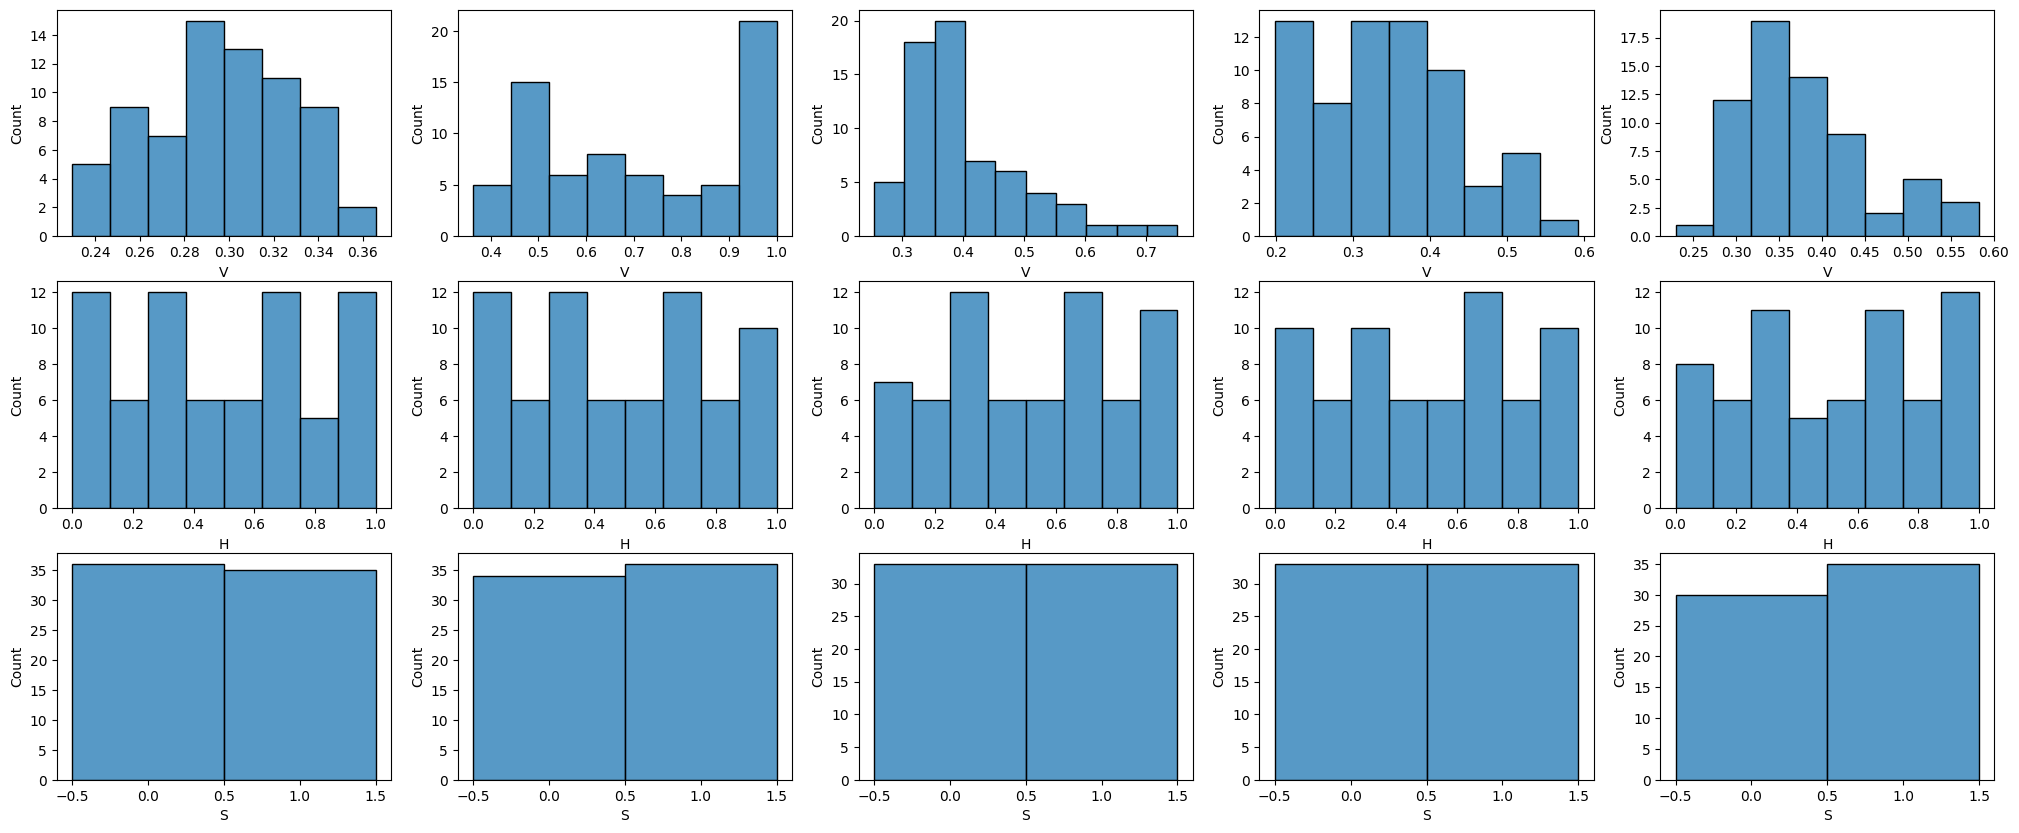

In [162]:
# Look at distributions of variables per target category
non_targets = ['V', 'H', 'S']
fig, ax = plt.subplots(ncols = df['M'].nunique(), nrows = 3, figsize = [25,10])
for idx in range(df['M'].nunique()):
    for idy in range(len(non_targets)):
        _ = sns.histplot(data = df.loc[df['M'] == idx + 1], x = non_targets[idy], ax = ax[idy][idx])

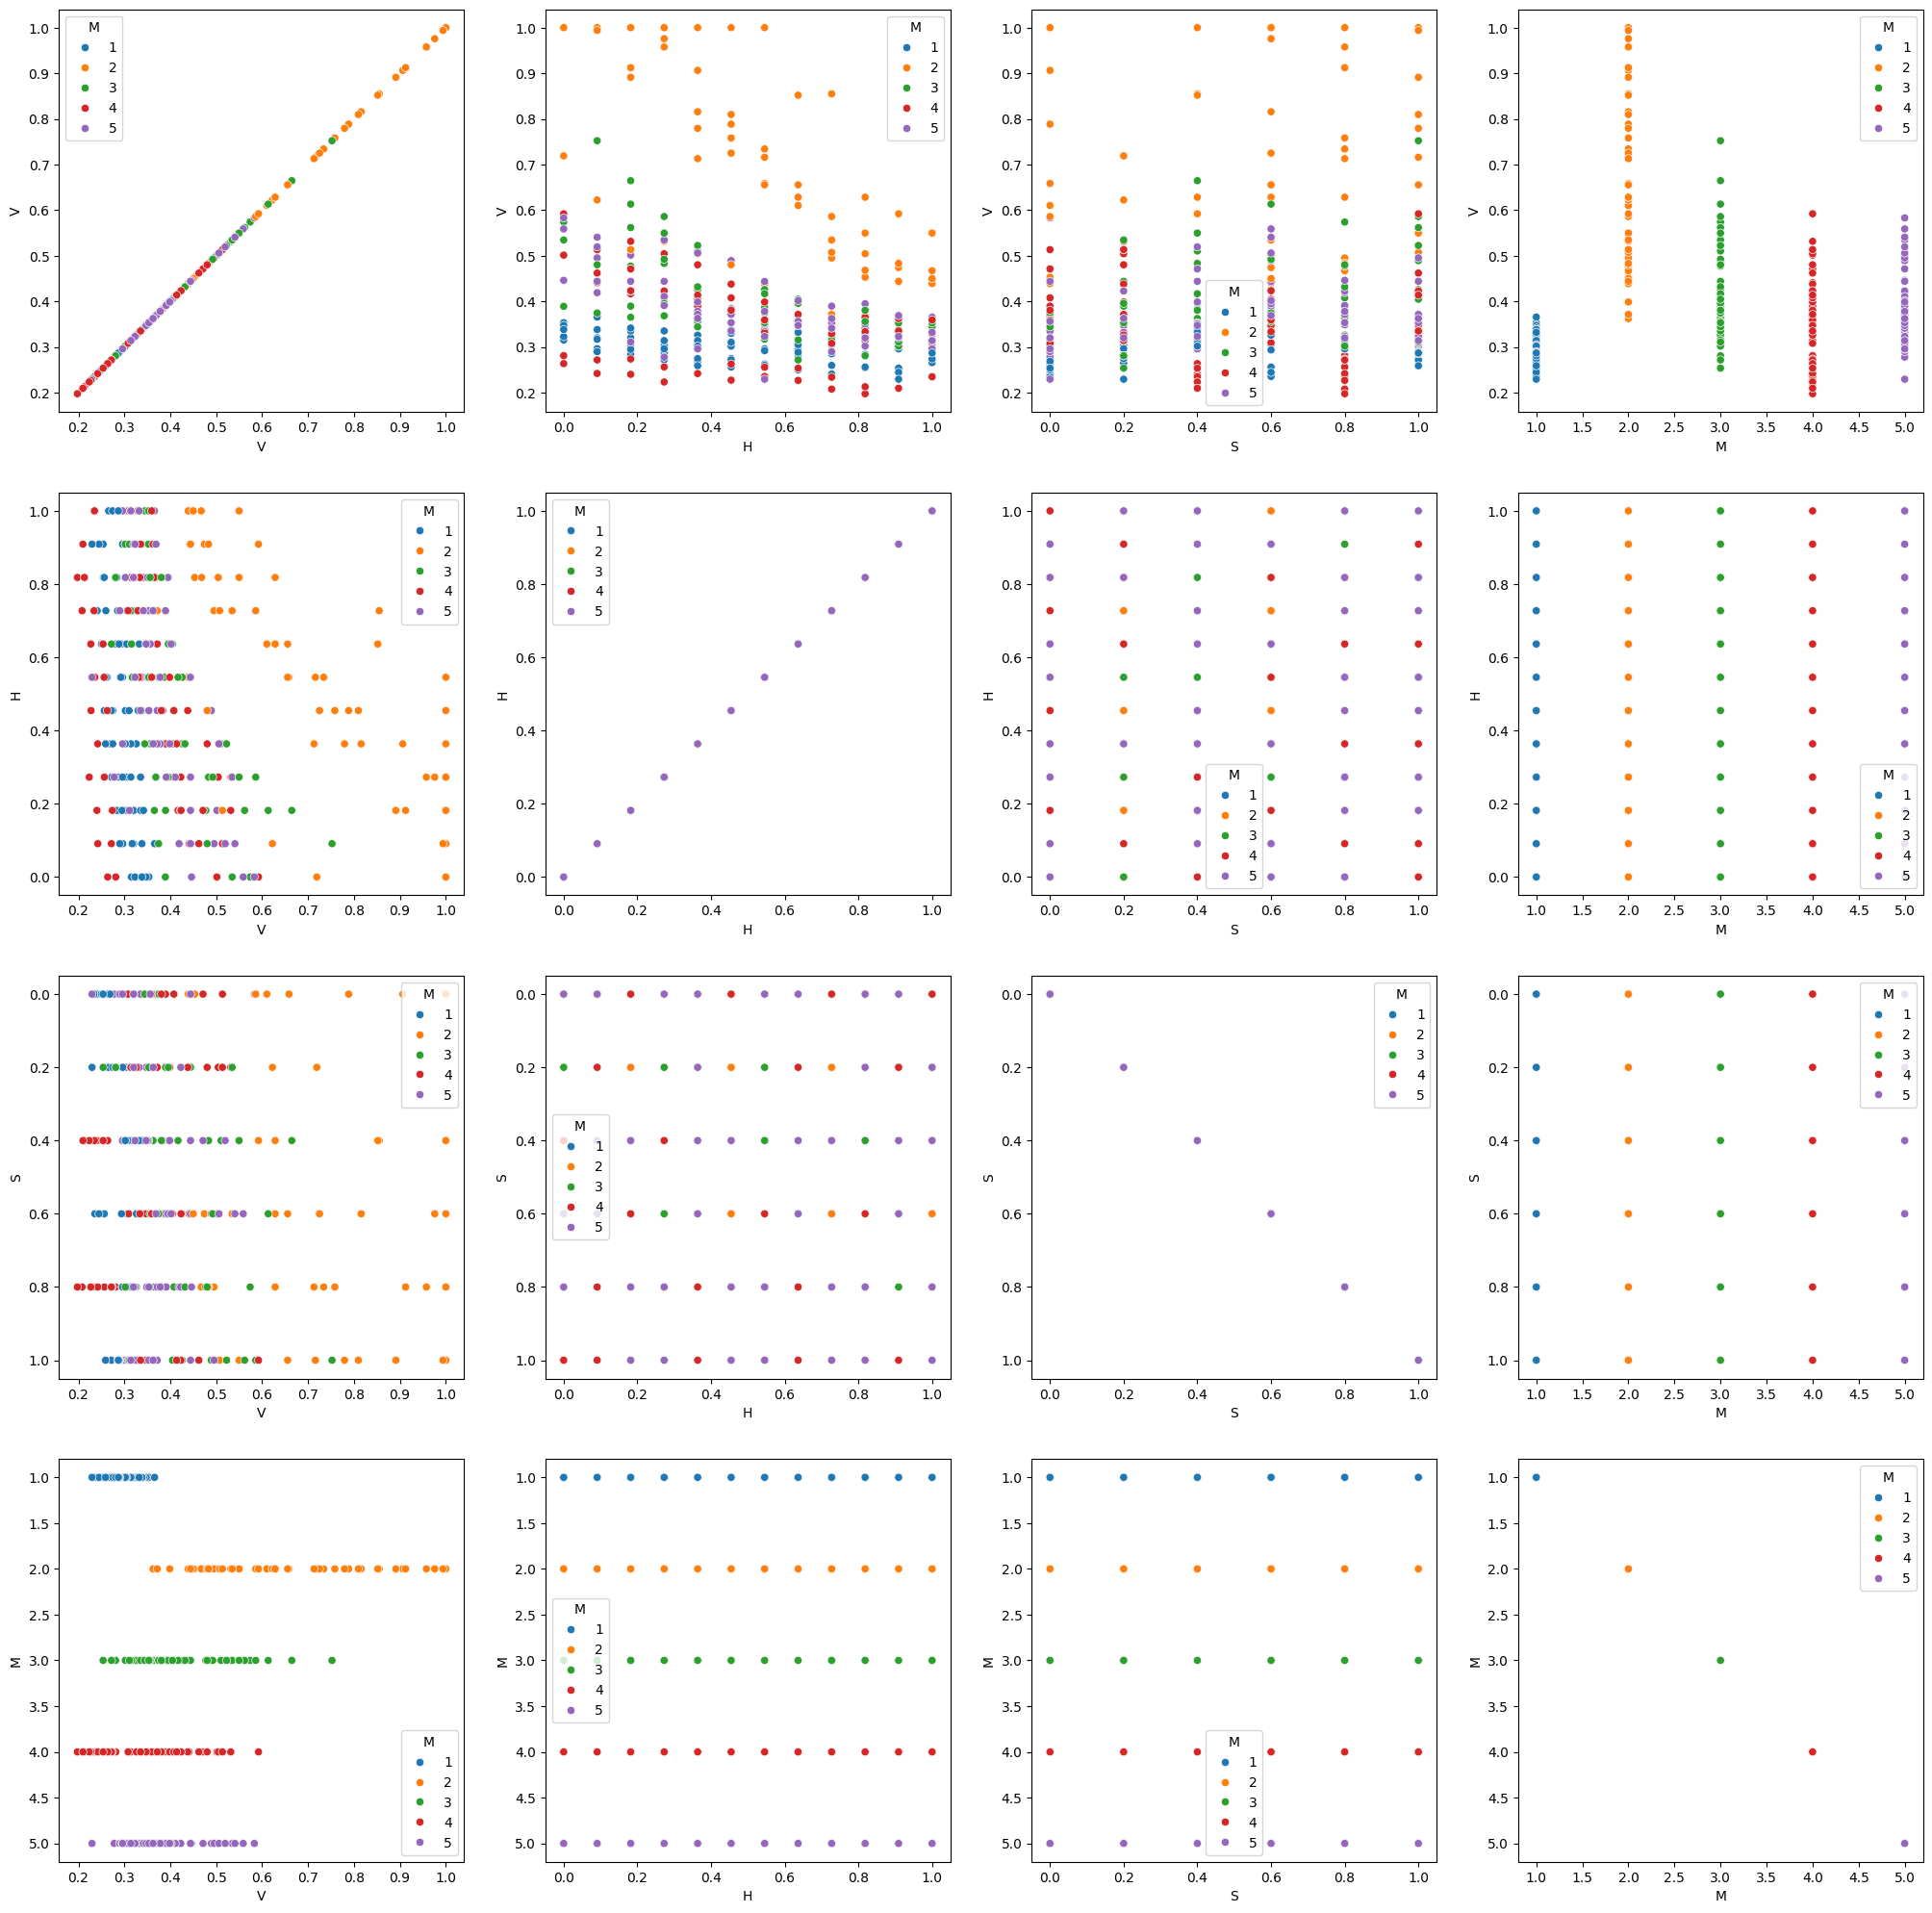

In [163]:
# check correlation of variables:

fig, ax = plt.subplots(nrows = len(df.columns), ncols = len(df.columns), figsize = [25, 25])
for idx in range(len(df.columns)):
    for idy in range(len(df.columns)):
        _ = sns.scatterplot(data = df, x = df.columns[idx], y = df.columns[idy], hue = 'M', ax = ax[idy][idx])

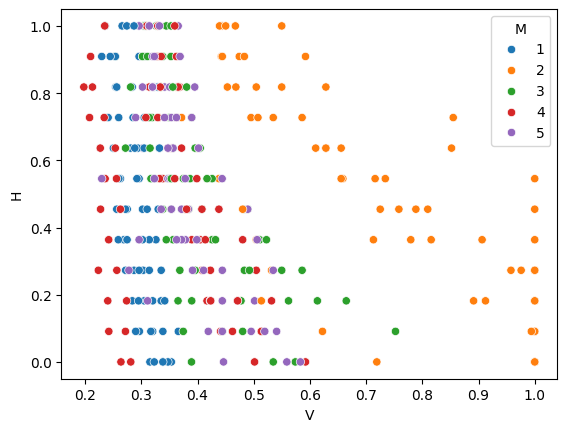

In [164]:
# represent in 3d
from mpl_toolkits.mplot3d import Axes3D
_ = sns.scatterplot(data = df, x = 'V', y = 'H', hue = 'M')

In [165]:
df = pd.get_dummies(df, columns=['S'], dtype= int, drop_first=True)
df

,V,H,M,S_0.6,S_0.2,S_0.8,S_0.4,S_1.0
0,0.338157,0.000000,1,0,0,0,0,0
1,0.320241,0.181818,1,0,0,0,0,0
2,0.287009,0.272727,1,0,0,0,0,0
3,0.256284,0.454545,1,0,0,0,0,0
4,0.262840,0.545455,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
333,0.323262,0.909091,5,0,0,0,1,0
334,0.444108,0.181818,5,0,0,0,0,1
335,0.353474,0.454545,5,0,0,0,0,1
336,0.362537,0.727273,5,0,0,0,0,1


In [166]:
from sklearn.cluster import KMeans

cols = ['H', 'V']
X = df[cols]
model  = KMeans(n_clusters = 5, max_iter = 2000, random_state= 69, algorithm= 'lloyd')
model.fit(X=X)
df['M_clust'] = model.predict(X=X)
df['M_clust'] = df['M_clust'] + 1

In [167]:
df

,V,H,M,S_0.6,S_0.2,S_0.8,S_0.4,S_1.0,M_clust
0,0.338157,0.000000,1,0,0,0,0,0,5
1,0.320241,0.181818,1,0,0,0,0,0,3
2,0.287009,0.272727,1,0,0,0,0,0,3
3,0.256284,0.454545,1,0,0,0,0,0,4
4,0.262840,0.545455,1,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...
333,0.323262,0.909091,5,0,0,0,1,0,1
334,0.444108,0.181818,5,0,0,0,0,1,5
335,0.353474,0.454545,5,0,0,0,0,1,4
336,0.362537,0.727273,5,0,0,0,0,1,1


In [168]:
df_actual = df[['M', 'V', 'H']]
df_actual_group = df_actual.groupby('M').mean().reset_index()
df_actual_group

C:\Users\Corey\AppData\Local\Temp\ipykernel_10712\2520925442.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_actual_group = df_actual.groupby('M').mean().reset_index()


,M,V,H
0,1,0.296463,0.495519
1,2,0.721123,0.487013
2,3,0.402408,0.527548
3,4,0.345365,0.506887
4,5,0.379598,0.530070


In [169]:
df_pred = df[['M_clust', 'V', 'H']]
df_pred_grouped = df_pred.groupby('M_clust').mean().reset_index()
df_pred_grouped

,M_clust,V,H
0,1,0.344687,0.862013
1,2,0.914903,0.275253
2,3,0.372780,0.295056
3,4,0.365809,0.551136
4,5,0.443392,0.087479


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

df['is_mine'] = np.where(df['M'] == 1, 0, 1)
X = df.drop(columns = ['M_clust','M', 'is_mine'])
y = df['is_mine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = KNeighborsClassifier(n_neighbors = 6)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results = X_test.copy()
results['y'] = y_test
results['y_hat'] = y_pred
results['correct'] = np.array(results['y'] == results['y_hat'], dtype= int)

In [171]:
results['correct'].sum()/len(results)

np.float64(0.6911764705882353)

In [172]:
scores = []
ks = []
for k in range(15):
    ks.append(k + 1)
    model = KNeighborsClassifier(n_neighbors = k + 1, metric = 'euclidean', weights= 'distance')

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    results = X_test.copy()
    results['y'] = y_test
    results['y_hat'] = y_pred
    results['correct'] = np.array(results['y'] == results['y_hat'], dtype= int)
    scores.append(float(results['correct'].sum()/len(results)))

print(ks)
print(scores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.6470588235294118, 0.6470588235294118, 0.7352941176470589, 0.6911764705882353, 0.6911764705882353, 0.6911764705882353, 0.6911764705882353, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942]


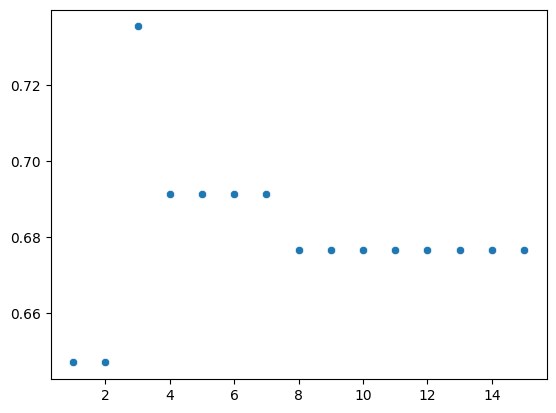

In [173]:
_ = sns.scatterplot(x = ks, y = scores)

In [174]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=results['y'], y_pred=results['y_hat'])
print(conf_mat/len(X_test))

[[0.         0.30882353]
 [0.01470588 0.67647059]]


In [175]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf= 5)

model.fit(X_train, y_train)

results = X_test.copy()
results['yhat'] = model.predict(X_test)
results['y'] = y_test

In [176]:
results

,V,H,S_0.6,S_0.2,S_0.8,S_0.4,S_1.0,yhat,y
45,0.285347,0.727273,0,0,0,0,1,1,0
272,0.374622,0.090909,0,0,0,0,0,1,1
77,0.467341,1.000000,0,0,1,0,0,1,1
215,0.341389,0.727273,0,0,0,1,0,1,1
232,0.244713,0.909091,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
67,0.438066,0.545455,0,1,0,0,0,1,1
289,0.380664,0.818182,0,0,0,1,0,1,1
175,0.416918,0.181818,0,0,0,0,1,1,1
274,0.315558,0.636364,0,0,0,0,0,0,1


In [177]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(results['y'], results['yhat'])
conf_matrix/len(X_test)

array([[0.20588235, 0.10294118],
       [0.05882353, 0.63235294]])

In [178]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(max_depth = 10, n_estimators= 200, min_samples_leaf = 2, min_samples_split = 5, criterion = 'entropy')

model.fit(X_train, y_train)

results = X_test.copy()
results['yhat'] = model.predict(X_test)
results['y'] = y_test

In [179]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(results['y'], results['yhat'])
conf_matrix/len(X_test)

array([[0.16176471, 0.14705882],
       [0.        , 0.69117647]])

In [180]:
df

,V,H,M,S_0.6,S_0.2,S_0.8,S_0.4,S_1.0,M_clust,is_mine
0,0.338157,0.000000,1,0,0,0,0,0,5,0
1,0.320241,0.181818,1,0,0,0,0,0,3,0
2,0.287009,0.272727,1,0,0,0,0,0,3,0
3,0.256284,0.454545,1,0,0,0,0,0,4,0
4,0.262840,0.545455,1,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...
333,0.323262,0.909091,5,0,0,0,1,0,1,1
334,0.444108,0.181818,5,0,0,0,0,1,5,1
335,0.353474,0.454545,5,0,0,0,0,1,4,1
336,0.362537,0.727273,5,0,0,0,0,1,1,1


In [181]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, log_softmax
from keras.optimizers import Adam,SGD
from keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

In [182]:
def build_model():
    model = Sequential([
    Dense(10, activation='relu', name = 'input'),
    Dense(25, activation= 'relu', name = 'hidden1'),
    Dense(25, activation= 'relu', name = 'hidden2'),
    Dense(10, activation= 'relu', name = 'hidden3'),
    Dense(1, activation = 'sigmoid', name = 'output')])

    model.compile(optimizer=SGD(learning_rate = 0.001, momentum = 0.003), metrics=['accuracy'], loss = BinaryCrossentropy(from_logits=False))
    return model

model = build_model()


In [183]:
import tensorflow as tf

X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model.fit(X_train, y_train, epochs = 250)

y_pred = model.predict(X_test)

Epoch 1/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8182 - loss: 0.6385  
Epoch 2/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.6429 
Epoch 3/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8211 - loss: 0.6328 
Epoch 4/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.6348 
Epoch 5/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8107 - loss: 0.6318 
Epoch 6/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8124 - loss: 0.6294 
Epoch 7/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.6310 
Epoch 8/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8390 - loss: 0.6223 
Epoch 9/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.6259 
Epoch 10/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8199 - loss: 0.6201 
Epoch 11/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8244 - loss: 0.6170 
Epoch 12/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8166 - lo

In [184]:
score = model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7050 - loss: 0.6360 


In [185]:
print(df['M'].unique())

[1, 2, 3, 4, 5]
Categories (5, int64): [1, 2, 3, 4, 5]


In [186]:
def build_model():
    model = Sequential([
    Dense(10, activation='relu', name = 'input'),
    Dense(25, activation= 'relu', name = 'hidden1'),
    Dense(5, activation = 'softmax', name = 'output')])

    model.compile(optimizer=SGD(learning_rate = 0.001, momentum = 0.003), metrics=['accuracy'], loss = SparseCategoricalCrossentropy(from_logits=True))
    return model

model = build_model()

In [187]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()
y = encoder.fit_transform(df['M'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model.fit(X_train, y_train, epochs = 250)

y_pred = model.predict(X_test)

Epoch 1/250


c:\Users\Corey\personal_code\landmines_project\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2383 - loss: 1.6451  
Epoch 2/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2281 - loss: 1.6537 
Epoch 3/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1797 - loss: 1.6815 
Epoch 4/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2021 - loss: 1.6710 
Epoch 5/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1898 - loss: 1.6821 
Epoch 6/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2151 - loss: 1.6382 
Epoch 7/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2227 - loss: 1.6525 
Epoch 8/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1978 - loss: 1.6492 
Epoch 9/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1927 - loss: 1.6586 
Epoch 10/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2312 - loss: 1.6373 
Epoch 11/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2414 - loss: 1.6459 
Epoch 12/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2029 - loss: 1.6681 


In [188]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1746 - loss: 1.6102 


[1.619544506072998, 0.1617647111415863]